# Importing the libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [158]:
# Importing the data
path = 'C:\\Users\Manan\Desktop\loan.csv'
loan = pd.read_csv(path, low_memory=False)

In [159]:
# Checking if the dataframe is imported correctly
pd.set_option('display.max_columns',111)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [160]:
# Data type of each column
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [161]:
# Checking for duplicate values
sum(loan.duplicated(subset = "id")) == 0

True

In [162]:
# Checking the dimensions of the dataframe
loan.shape

(39717, 111)

In [163]:
# Checking for null values in the dataframe
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [164]:
# Column wise null percentage for dataframe
round(100*(loan.isnull().sum() / len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Data Cleaning

In [165]:
# Dropping columns with all NA values
loan.dropna(axis = 1, how ='all', inplace=True)

In [166]:
# Dropping columns with high null values
loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], axis=1, inplace=True)

In [167]:
# Dropping all the columns which have only one unique value
for col in loan.columns:
    if len(loan[col].unique())==1:
        loan.drop(col, inplace= True, axis=1)

In [168]:
# Dropping columns which have only 0 and NaN values
loan.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1, inplace=True)

In [169]:
# Checking the df after dropping the columns
loan.shape

(39717, 44)

In [170]:
# Column wise null percentage for dataframe after dropping columns
round(100*(loan.isnull().sum() / len(loan.index)),2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

In [171]:
# Examining the loan amount column
loan['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [172]:
# Examining the Interest Rate column
loan['int_rate'].describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [173]:
# Converting the intrest rate to numeric type
loan["int_rate"] = loan["int_rate"].astype(str)
loan["int_rate"] = loan["int_rate"].map(lambda x: x.rstrip('%')).astype(np.float64)

In [174]:
# Examining the Employement Title column
loan['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [175]:
# Making changes in the emp_title column
loan['emp_title'] = loan['emp_title'].astype(str).str.lower()
loan['emp_title'] = loan['emp_title'].str.replace('.', '')
loan['emp_title'] = loan['emp_title'].str.replace('-', ' ')
loan['emp_title'] = loan['emp_title'].str.replace('united states', 'us')
loan['emp_title'] = loan['emp_title'].str.replace('us postal service', 'usps')
loan['emp_title'] = loan['emp_title'].str.replace('usaf', 'us air force')
loan['emp_title'] = loan['emp_title'].str.replace('self employed', 'self')
loan['emp_title'] = loan['emp_title'].str.replace('wells fargo bank', 'wells fargo')
loan['emp_title'] = loan['emp_title'].str.replace('verizon wireless', 'verizon')
loan['emp_title'] = loan['emp_title'].str.replace('ups', 'united parcel service')
loan['emp_title'] = loan['emp_title'].str.replace('wal mart', 'walmart')
loan['emp_title'] = loan['emp_title'].str.replace('jpmorgan chase', 'jp morgan chase')
loan['emp_title'] = loan['emp_title'].str.replace('department of defense', 'us army')

In [176]:
loan['emp_title'].value_counts()

nan                                2459
us army                             336
us air force                        173
usps                                163
self                                153
bank of america                     137
walmart                             115
verizon                             107
wells fargo                         103
united parcel service               102
jp morgan chase                      89
us navy                              81
at&t                                 79
kaiser permanente                    69
ibm                                  68
walgreens                            53
lockheed martin                      49
state of california                  48
home depot                           47
target                               42
comcast                              37
best buy                             36
booz allen hamilton                  36
northrop grumman                     35
fidelity investments                 34


In [177]:
# Examining the Employement Length column
loan['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [178]:
# Getting the number of employement years
loan['employement_years'] = loan['emp_length']
loan['employement_years'] = loan['employement_years'].apply(lambda x: 0 if x=='< 1 year' else(1 if x=='1 year' else(2 if x=='2 years' else (3 if x=='3 years' else (4 if x=='4 years' else(5 if x=='5 years' else(6 if x=='6 years' else(7 if x=='7 years' else(8 if x=='8 years' else(9 if x=='9 years' else 10))))))))))
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,employement_years
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,nan,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,10
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,nan,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,10
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,air resources board,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,10
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,university medical group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1


In [179]:
# Examining the Annual Income column
loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [180]:
# Creating groups out of annual income
loan['Income_cat'] = loan['annual_inc']
loan['Income_cat'] = loan['Income_cat'].apply(lambda x: 'Low' if x<40000 else('Medium' if 40000<x<70000 else ('High' if 70000<x<110000 else 'Very High')))
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,employement_years,Income_cat
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,nan,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,10,Low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0,Low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,nan,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,10,Low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,air resources board,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,10,Medium
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,university medical group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,High


In [181]:
loan['Income_cat'].value_counts()

Medium       15096
High          9284
Low           9001
Very High     6336
Name: Income_cat, dtype: int64

In [182]:
# Examining the Address State column
loan['addr_state'].describe()

count     39717
unique       50
top          CA
freq       7099
Name: addr_state, dtype: object

In [183]:
# Converting the issue_date into datetime format
loan["issue_d"] = loan["issue_d"].astype(str)
loan["issue_d"] = pd.to_datetime(loan["issue_d"], format='%b-%y', yearfirst=False)

In [184]:
# Getting the year from the issue_d
loan['issue_year']= loan['issue_d'].dt.year

# Univariate Analysis

Univariate Analysis for Numeric attributes

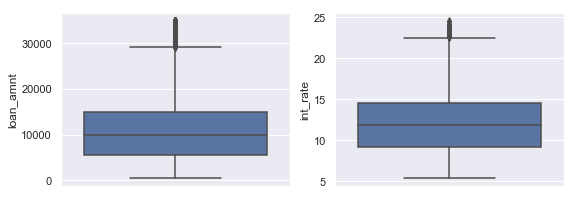

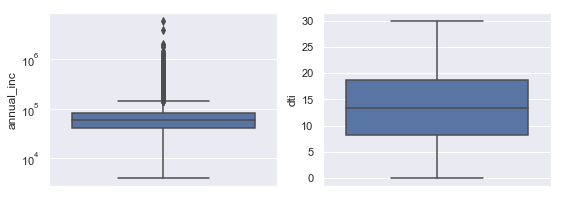

In [185]:
# Numeric attributes of the data
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,7))
plt.figure(1)
# subplot 1
plt.subplot(2, 2, 1)
sns.boxplot(y='loan_amnt',data=loan)
# subplot 2 
plt.subplot(2, 2, 2)
sns.boxplot(y='int_rate',data=loan)
fig = plt.figure(figsize=(9,7))
plt.figure(2)
# subplot 3
plt.subplot(2, 2, 1)
sns.boxplot(y='annual_inc', data= loan)
plt.yscale('log')
# subplot 4 
plt.subplot(2, 2, 2)
sns.boxplot(y='dti',data=loan)
plt.show()

Univariate Analysis for Categorical attributes

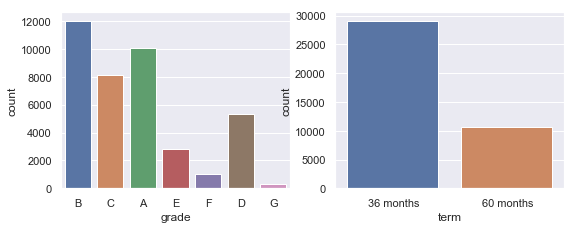

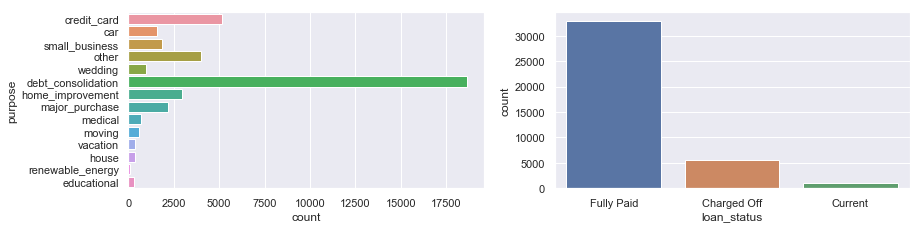

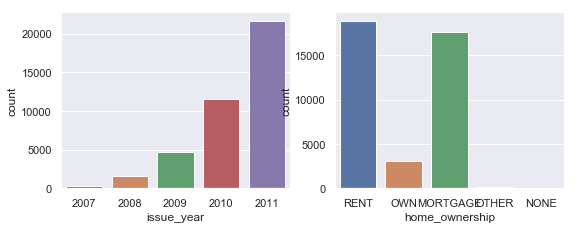

In [186]:
# Categorical attributes of the data
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,11))
plt.figure(1)
# subplot 1
plt.subplot(3, 2, 1)
sns.countplot(x="grade", data=loan)
# subplot 2 
plt.subplot(3, 2, 2)
sns.countplot(x="term", data=loan)
fig = plt.figure(figsize=(14,11))
plt.figure(2)
# subplot 3
plt.subplot(3, 2, 1)
sns.countplot(y="purpose", data=loan)
# subplot 4 
plt.subplot(3, 2, 2)
sns.countplot(x="loan_status", data=loan)
fig = plt.figure(figsize=(9,11))
plt.figure(3)
# subplot 5
plt.subplot(3, 2, 1)
sns.countplot(x="issue_year", data=loan)
# subplot 6 
plt.subplot(3, 2, 2)
sns.countplot(x="home_ownership", data=loan)
plt.show()

# Bivariate Analysis

## Loan amount v/s other categorial variables

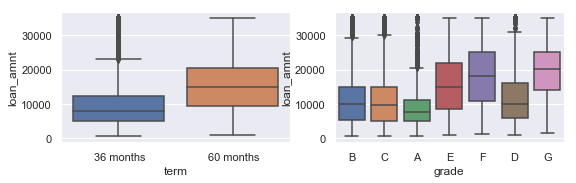

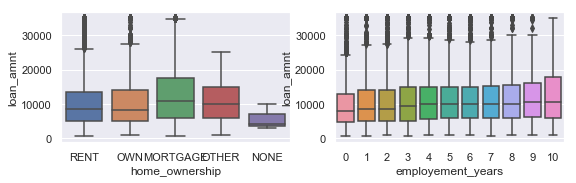

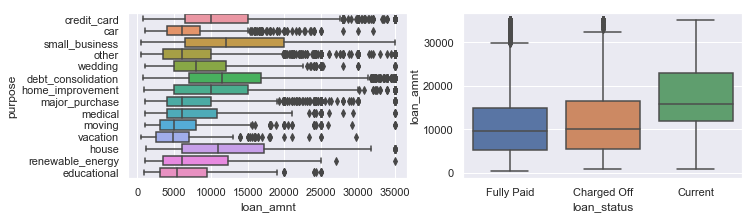

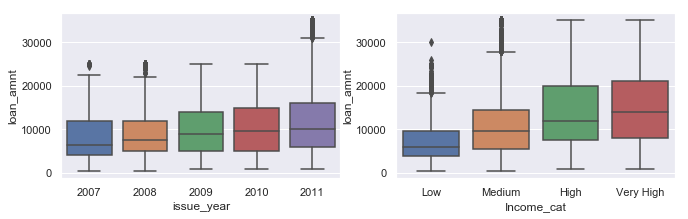

In [187]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,11))
plt.figure(1)
# subplot 1
plt.subplot(4, 2, 1)
sns.boxplot(y = "loan_amnt", x = "term", data = loan)
# subplot 2 
plt.subplot(4, 2, 2)
sns.boxplot(y = "loan_amnt", x = "grade", data = loan)
fig = plt.figure(figsize=(9,11))
plt.figure(2)
# subplot 3
plt.subplot(4, 2, 1)
sns.boxplot(y = "loan_amnt", x = "home_ownership", data = loan)
# subplot 4 
plt.subplot(4, 2, 2)
sns.boxplot(y = "loan_amnt", x = "employement_years", data = loan)
fig = plt.figure(figsize=(11,14))
plt.figure(3)
# subplot 5
plt.subplot(4, 2, 1)
sns.boxplot(x = "loan_amnt", y = "purpose", data = loan)
# subplot 6
plt.subplot(4, 2, 2)
sns.boxplot(y = "loan_amnt", x = "loan_status", data = loan)
fig = plt.figure(figsize=(11,14))
plt.figure(4)
# subplot 7
plt.subplot(4, 2, 1)
sns.boxplot(y = "loan_amnt", x = "issue_year", data = loan)
# subplot 8
plt.subplot(4, 2, 2)
sns.boxplot(y = "loan_amnt", x = "Income_cat", data = loan)
plt.show()

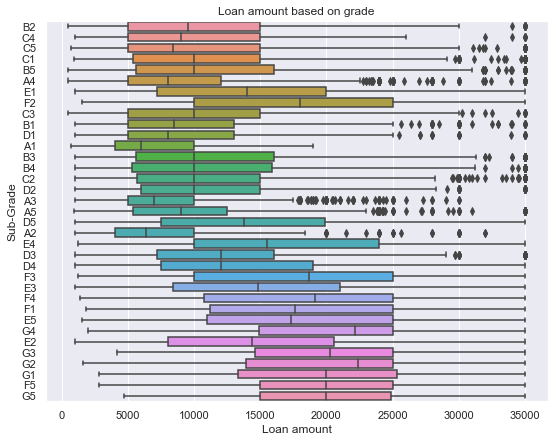

In [188]:
# Loan amount v/s on subgrade
plt.figure(figsize=(9, 7))
sns.boxplot(x = "loan_amnt", y = "sub_grade", data = loan)
plt.title("Loan amount based on grade")
plt.xlabel("Loan amount")
plt.ylabel("Sub-Grade")
plt.show()

## Interest rate v/s other categorical variabbles

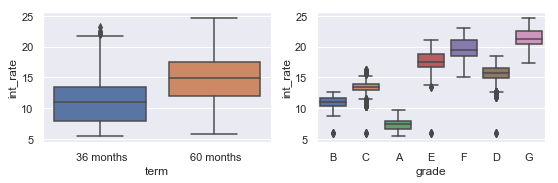

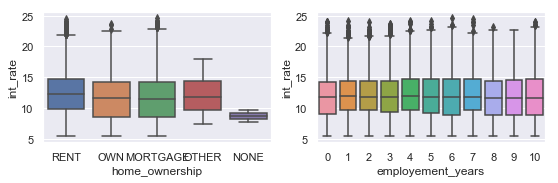

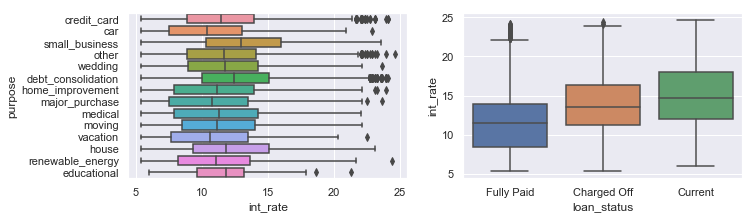

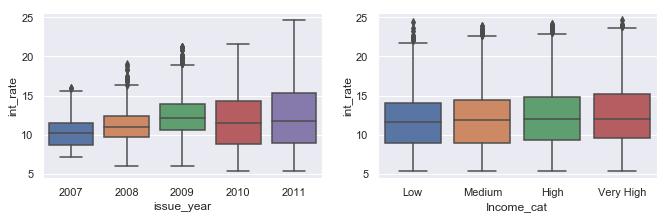

In [189]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,11))
plt.figure(1)
# subplot 1
plt.subplot(4, 2, 1)
sns.boxplot(y = "int_rate", x = "term", data = loan)
# subplot 2 
plt.subplot(4, 2, 2)
sns.boxplot(y = "int_rate", x = "grade", data = loan)
fig = plt.figure(figsize=(9,11))
plt.figure(2)
# subplot 3
plt.subplot(4, 2, 1)
sns.boxplot(y = "int_rate", x = "home_ownership", data = loan)
# subplot 4 
plt.subplot(4, 2, 2)
sns.boxplot(y = "int_rate", x = "employement_years", data = loan)
fig = plt.figure(figsize=(11,14))
plt.figure(3)
# subplot 5
plt.subplot(4, 2, 1)
sns.boxplot(x = "int_rate", y = "purpose", data = loan)
# subplot 6
plt.subplot(4, 2, 2)
sns.boxplot(y = "int_rate", x = "loan_status", data = loan)
fig = plt.figure(figsize=(11,14))
plt.figure(4)
# subplot 7
plt.subplot(4, 2, 1)
sns.boxplot(y = "int_rate", x = "issue_year", data = loan)
# subplot 8
plt.subplot(4, 2, 2)
sns.boxplot(y = "int_rate", x = "Income_cat", data = loan)
plt.show()

# Year of issue v/s other attributes

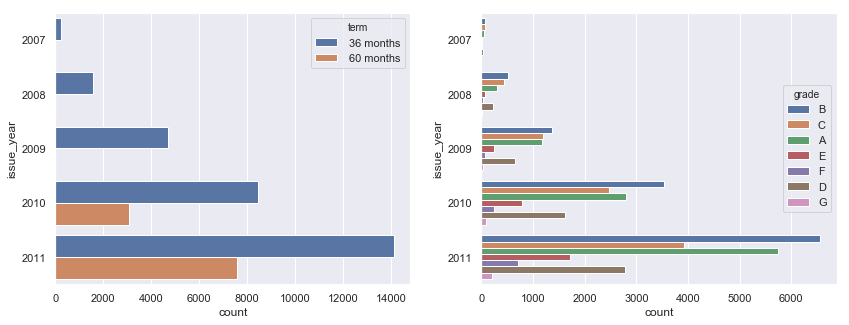

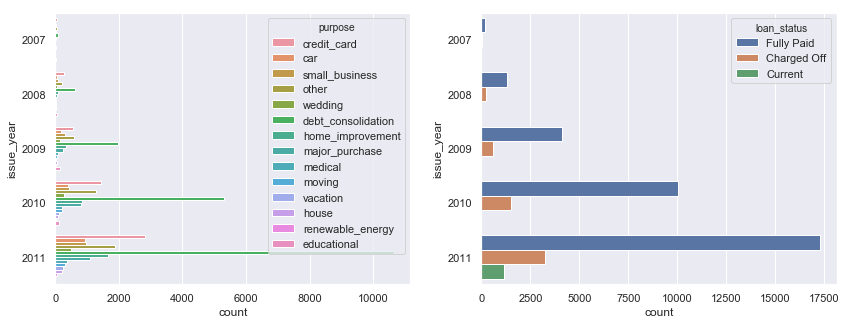

In [190]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(14,11))
plt.figure(1)
# subplot 1
plt.subplot(2, 2, 1)
sns.countplot(y = "issue_year",hue = "term", data = loan)
# subplot 2 
plt.subplot(2, 2, 2)
sns.countplot(y = "issue_year", hue = "grade", data = loan)
fig = plt.figure(figsize=(14,11))
plt.figure(2)
# subplot 3
plt.subplot(2, 2, 1)
sns.countplot(y = "issue_year", hue = "purpose", data = loan)
# subplot 4 
plt.subplot(2, 2, 2)
sns.countplot(y = "issue_year", hue = "loan_status", data = loan)

# Annual Income v/s other attributes

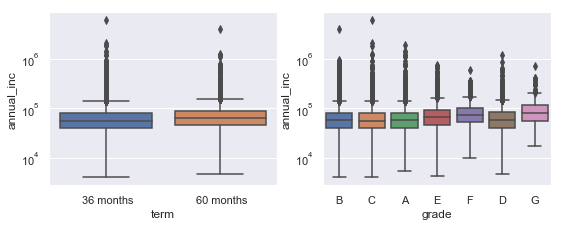

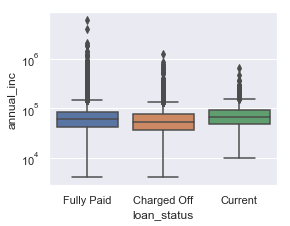

In [191]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,7))
plt.figure(1)
# subplot 1
plt.subplot(2, 2, 1)
sns.boxplot(y = "annual_inc",x = "term", data = loan)
plt.yscale('log')
# subplot 2 
plt.subplot(2, 2, 2)
sns.boxplot(y = "annual_inc", x = "grade", data = loan)
plt.yscale('log')
fig = plt.figure(figsize=(9,7))
plt.figure(2)
# subplot 3
plt.subplot(2, 2, 1)
sns.boxplot(y = "annual_inc", x = "loan_status", data = loan)
plt.yscale('log')
plt.show()

# Multivariate Analysis

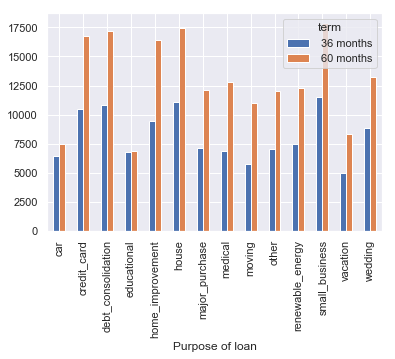

In [192]:
purpose_term = loan.groupby(['purpose','term']).loan_amnt.mean()
sns.set(style="darkgrid")
purpose_term.unstack().plot(kind='bar')
plt.xlabel("Purpose of loan")
plt.show()

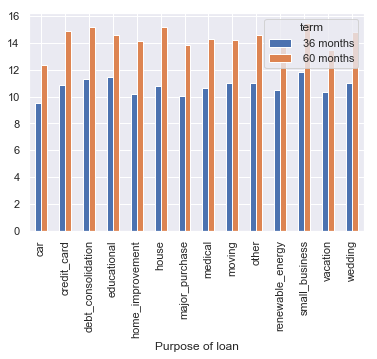

In [193]:
purpose_term1 = loan.groupby(['purpose','term']).int_rate.mean()
sns.set(style="darkgrid")
purpose_term1.unstack().plot(kind='bar')
plt.xlabel("Purpose of loan")
plt.show()

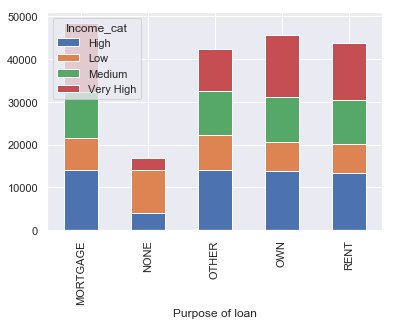

In [194]:
income_home = loan.groupby(['home_ownership','Income_cat']).loan_amnt.mean()
sns.set(style="darkgrid")
income_home.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Purpose of loan")
plt.show()

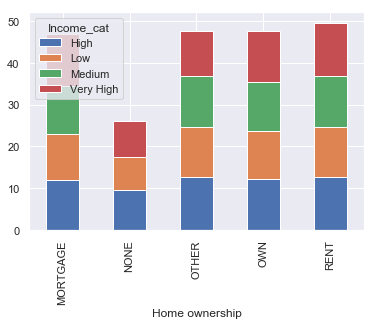

In [195]:
income_home1 = loan.groupby(['home_ownership', 'Income_cat']).int_rate.mean()
sns.set(style="darkgrid")
income_home1.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Home ownership")
plt.show()

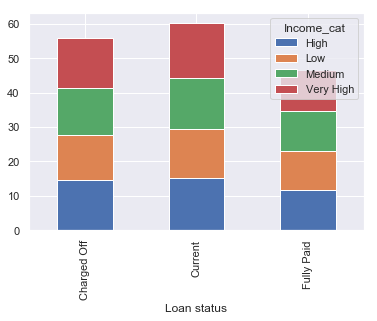

In [197]:
status_income = loan.groupby(['loan_status','Income_cat']).int_rate.mean()
sns.set(style="darkgrid")
status_income.unstack().plot(kind='bar',stacked=True)
plt.xlabel("Loan status")
plt.show()

# Segmented Analysis

In [198]:
# Getting details of people who have defaulted the loan
defaulters = loan.loc[loan.loan_status == 'Charged Off']

In [199]:
defaulters.shape

(5627, 47)

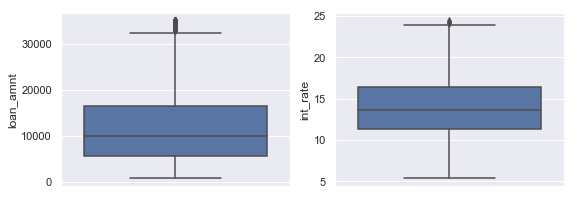

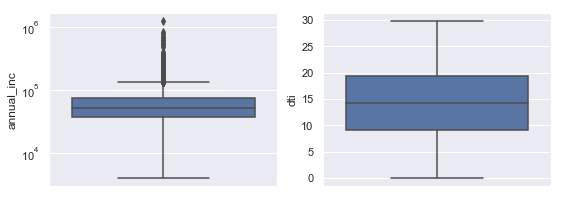

In [200]:
# Numeric attributes of the data
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,7))
plt.figure(1)
# subplot 1
plt.subplot(2, 2, 1)
sns.boxplot(y='loan_amnt',data=defaulters)
# subplot 2 
plt.subplot(2, 2, 2)
sns.boxplot(y='int_rate',data=defaulters)
fig = plt.figure(figsize=(9,7))
plt.figure(2)
# subplot 3
plt.subplot(2, 2, 1)
sns.boxplot(y='annual_inc', data= defaulters)
plt.yscale('log')
# subplot 4 
plt.subplot(2, 2, 2)
sns.boxplot(y='dti',data=defaulters)
plt.show()

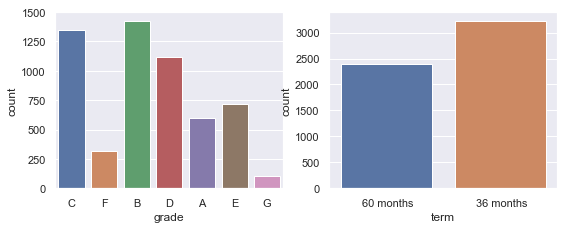

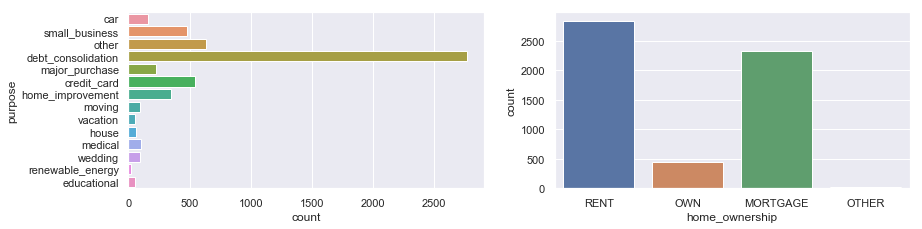

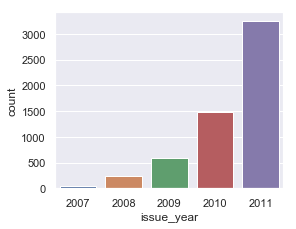

In [201]:
# Categorical attributes of the data
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,11))
plt.figure(1)
# subplot 1
plt.subplot(3, 2, 1)
sns.countplot(x="grade", data=defaulters)
# subplot 2 
plt.subplot(3, 2, 2)
sns.countplot(x="term", data=defaulters)
fig = plt.figure(figsize=(14,11))
plt.figure(2)
# subplot 3
plt.subplot(3, 2, 1)
sns.countplot(y="purpose", data=defaulters)
# subplot 4 
plt.subplot(3, 2, 2)
sns.countplot(x="home_ownership", data=defaulters)
fig = plt.figure(figsize=(9,11))
plt.figure(3)
# subplot 5
plt.subplot(3, 2, 1)
sns.countplot(x="issue_year", data=defaulters)
plt.show()

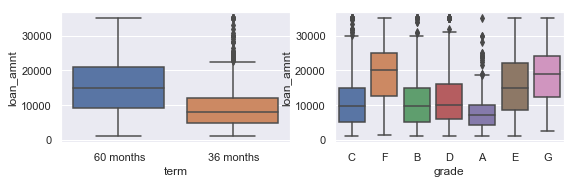

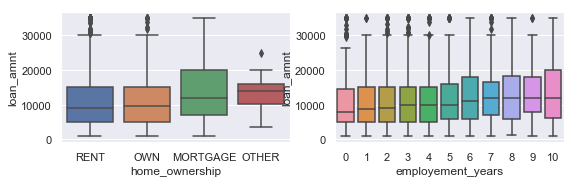

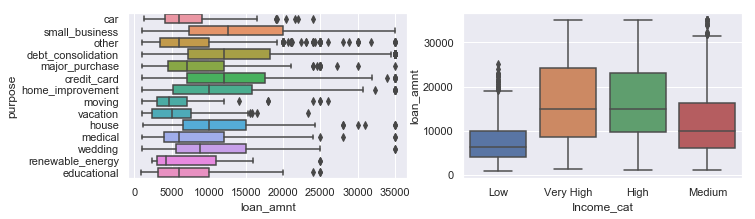

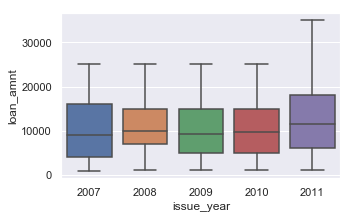

In [202]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,11))
plt.figure(1)
# subplot 1
plt.subplot(4, 2, 1)
sns.boxplot(y = "loan_amnt", x = "term", data = defaulters)
# subplot 2 
plt.subplot(4, 2, 2)
sns.boxplot(y = "loan_amnt", x = "grade", data = defaulters)
fig = plt.figure(figsize=(9,11))
plt.figure(2)
# subplot 3
plt.subplot(4, 2, 1)
sns.boxplot(y = "loan_amnt", x = "home_ownership", data = defaulters)
# subplot 4 
plt.subplot(4, 2, 2)
sns.boxplot(y = "loan_amnt", x = "employement_years", data = defaulters)
fig = plt.figure(figsize=(11,14))
plt.figure(3)
# subplot 5
plt.subplot(4, 2, 1)
sns.boxplot(x = "loan_amnt", y = "purpose", data = defaulters)
# subplot 6
plt.subplot(4, 2, 2)
sns.boxplot(y = "loan_amnt", x = "Income_cat", data = defaulters)
fig = plt.figure(figsize=(11,14))
plt.figure(4)
# subplot 7
plt.subplot(4, 2, 1)
sns.boxplot(y = "loan_amnt", x = "issue_year", data = defaulters)
plt.show()

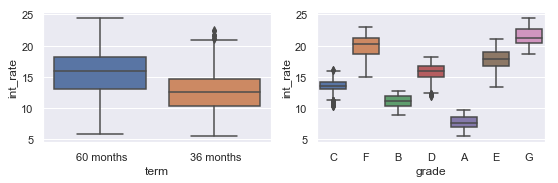

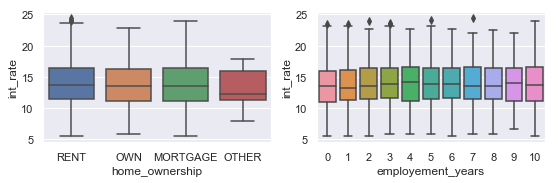

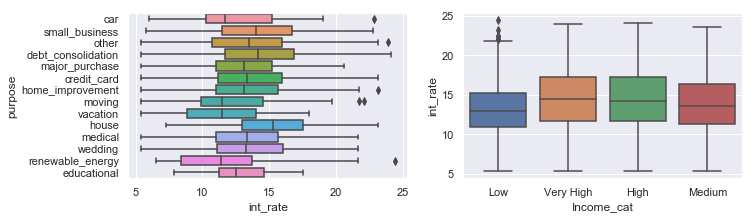

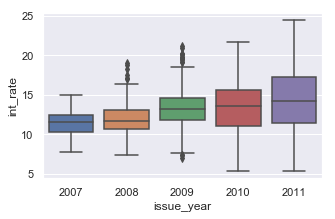

In [203]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(9,11))
plt.figure(1)
# subplot 1
plt.subplot(4, 2, 1)
sns.boxplot(y = "int_rate", x = "term", data = defaulters)
# subplot 2 
plt.subplot(4, 2, 2)
sns.boxplot(y = "int_rate", x = "grade", data = defaulters)
fig = plt.figure(figsize=(9,11))
plt.figure(2)
# subplot 3
plt.subplot(4, 2, 1)
sns.boxplot(y = "int_rate", x = "home_ownership", data = defaulters)
# subplot 4 
plt.subplot(4, 2, 2)
sns.boxplot(y = "int_rate", x = "employement_years", data = defaulters)
fig = plt.figure(figsize=(11,14))
plt.figure(3)
# subplot 5
plt.subplot(4, 2, 1)
sns.boxplot(x = "int_rate", y = "purpose", data = defaulters)
# subplot 6
plt.subplot(4, 2, 2)
sns.boxplot(y = "int_rate", x = "Income_cat", data = defaulters)
fig = plt.figure(figsize=(11,14))
plt.figure(4)
# subplot 7
plt.subplot(4, 2, 1)
sns.boxplot(y = "int_rate", x = "issue_year", data = defaulters)
plt.show()


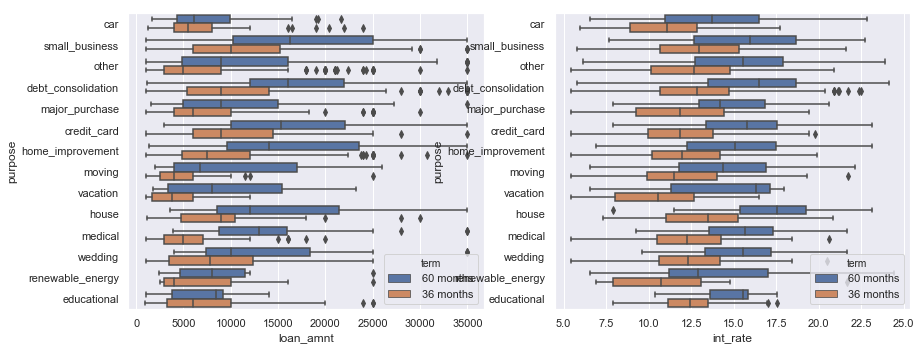

In [204]:
# Term and purpose of loan v/s loan amount and interest rate for defaulters
sns.set_style('darkgrid')
fig = plt.figure(figsize=(14,12))
plt.figure(1)
# subplot 1
plt.subplot(2, 2, 1)
sns.boxplot(y = "purpose", x = "loan_amnt", hue='term', data = defaulters)
# subplot 2 
plt.subplot(2, 2, 2)
sns.boxplot(y = "purpose", x = "int_rate", hue='term', data = defaulters)
plt.show()

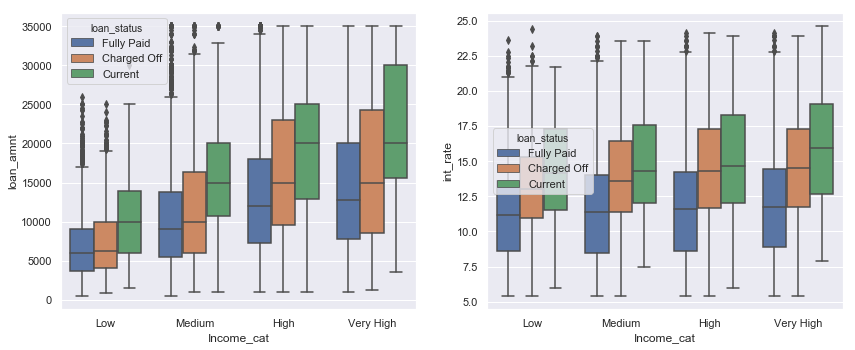

In [205]:
# Income category and loan status of loan v/s loan amount and interest rate for defaulters
sns.set_style('darkgrid')
fig = plt.figure(figsize=(14,12))
plt.figure(1)
# subplot 1
plt.subplot(2, 2, 1)
sns.boxplot(x = "Income_cat", y = "loan_amnt", hue='loan_status', data = loan)
# subplot 2 
plt.subplot(2, 2, 2)
sns.boxplot(x = "Income_cat", y = "int_rate", hue='loan_status', data = loan)
plt.show()

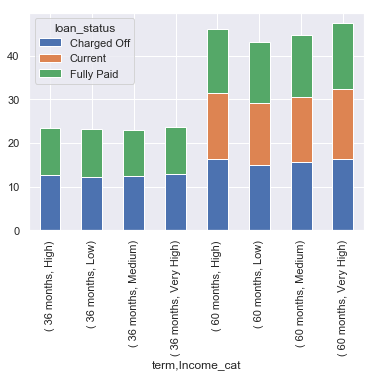

In [206]:
# loan term, income category,loan status v/s interest rate
A = loan.groupby(['term','Income_cat', 'loan_status']).int_rate.mean()
sns.set(style="darkgrid")
A.unstack().plot(kind='bar',stacked=True)

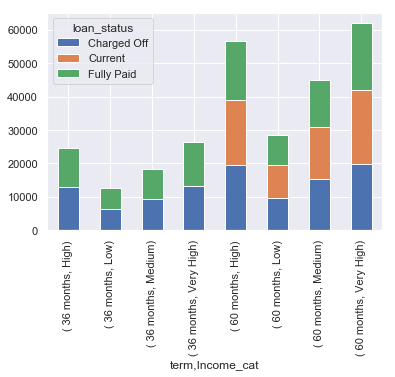

In [207]:
# loan term, income category,loan status v/s loan amount
B = loan.groupby(['term','Income_cat', 'loan_status']).loan_amnt.mean()
sns.set(style="darkgrid")
B.unstack().plot(kind='bar',stacked=True)